In [1]:
%load_ext autoreload
%autoreload 2


In [56]:
from domino.slices.celeba import CelebASliceBuilder
from domino.evaluate import run_sdm, score_sdms


In [57]:
score_df = score_sdms.out().load()

In [58]:
score_df.iloc[score_df.reset_index().groupby(["target", "slice_idx"])['precision_at_10'].idxmax().astype(int)]


,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target,run_sdm_run_id
81,1,0,0.786755,0.5,0.48,0.48,0.021891,0.042032,0.081436,0.758319,0.273272,black_hair,14464
85,0,1,0.975759,1.0,0.96,0.98,0.041988,0.083976,0.162811,0.298201,0.828571,black_hair,14464
30,0,0,0.635123,0.4,0.24,0.11,0.025830,0.040590,0.077491,0.354244,0.037677,chubby,14460
39,4,1,0.998899,1.0,1.00,0.94,0.189723,0.371542,0.750988,0.181818,0.978723,chubby,14460
92,2,0,0.880746,1.0,0.88,0.81,0.026875,0.050625,0.096250,0.684375,0.444039,high_cheekbones,14465
95,0,1,0.940917,1.0,1.00,0.92,0.030679,0.060052,0.114230,0.114883,0.608997,high_cheekbones,14465
60,0,0,0.854216,1.0,0.80,0.65,0.021685,0.040273,0.079306,0.614622,0.386895,male,14459
68,3,1,0.946736,1.0,1.00,0.99,0.034083,0.067485,0.132243,0.443081,0.808458,male,14459
22,2,0,0.913939,0.9,0.92,0.58,0.153509,0.254386,0.390351,0.662281,0.153455,mustache,14463
29,4,1,0.999003,0.9,0.92,0.96,0.000000,0.000000,1.000000,1.000000,0.953307,mustache,14463


In [94]:
inp = run_sdm.inp(run_id=14463, load=True)
print(inp)
data_dp, emb_dp = inp["data_dp"], inp["emb_dp"]

data_dp = data_dp.lz[data_dp["split"].isin(["valid", "test"])].merge(
    emb_dp[["image_id", "emb"]], on="image_id"
)

{'data_dp': DataPanel(nrows: 29998, ncols: 51), 'emb_dp': DataPanel(nrows: 61910, ncols: 49), 'model': None, 'id_column': 'image_id', 'word_dp': DataPanel(nrows: 100000, ncols: 5), 'sdm_class': <class 'domino.sdm.gmm.MixtureModelSDM'>, 'sdm_config': {'weight_y_log_likelihood': 10, 'n_slices': 5, 'emb': 'emb'}, 'build_setting_run_id': 14421, 'corr': 0.0, 'correlate': 'wearing_hat', 'dataset': 'celeba', 'index': '131', 'n': 30000, 'parent_run_id': 14418, 'score_model_run_id': 14421, 'setting_id': 131, 'slice_category': 'correlation', 'synthetic_preds': True, 'target': 'mustache'}


In [95]:
from domino.sdm import MixtureModelSDM, SpotlightSDM
sdm = MixtureModelSDM(
    n_slices=5, 
    n_clusters=10, 
    weight_y_log_likelihood=10, 
    init_params="error",
    emb="emb",
    pca_components=128 
)

sdm.fit(data_dp.lz[data_dp["split"] == "valid"])
dp = sdm.transform(data_dp.lz[data_dp["split"] == "test"])

 18%|█▊        | 18/100 [00:00<00:01, 58.91it/s]


In [96]:
from domino.metrics import compute_sdm_metrics
slice_idx = 0

metrics_df = compute_sdm_metrics(dp)
metrics_df[metrics_df["slice_idx"] == slice_idx].sort_values(by="auroc", ascending=False)

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision
0,0,0,0.871416,0.9,0.68,0.40,0.105263,0.175439,0.267544,0.763158,0.078414
3,3,0,0.762351,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0,0.713799,0.0,0.00,0.06,0.004386,0.026316,0.096491,0.223684,0.105372
2,2,0,0.401583,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,0.285720,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.013158,0.000908


In [107]:
from domino.emb.clip import embed_words
pred_slice_idx = 0
words_dp = embed_words.out(5143).load().lz[:int(1.1e3)]
expl_dp = sdm.explain(words_dp=words_dp, data_dp=dp)
expl_dp.lz[(-expl_dp["pred_slices"][:, pred_slice_idx]).argsort()[:10]]

,word (PandasSeriesColumn),pred_slices (NumpyArrayColumn),frequency (PandasSeriesColumn)
0,woman,"np.ndarray(shape=(5,))",252130
1,top,"np.ndarray(shape=(5,))",660597
2,mother,"np.ndarray(shape=(5,))",365493
3,mary,"np.ndarray(shape=(5,))",222383
4,her,"np.ndarray(shape=(5,))",3866897
5,sister,"np.ndarray(shape=(5,))",213138
6,wife,"np.ndarray(shape=(5,))",433849
7,women's,"np.ndarray(shape=(5,))",353590
8,women,"np.ndarray(shape=(5,))",507038
9,may,"np.ndarray(shape=(5,))",2366872


In [ ]:

words_dp = words_dp.view()
slice_proto = (
    np.dot(dp["pred_slices"].T, dp["emb"])
    / dp["pred_slices"].sum(axis=0, keepdims=True).T
)

ref_proto = dp.lz[dp["target"] == 1]["emb"].data.mean(axis=0)

words_dp["pred_slices"] = np.dot(
    words_dp["emb"].data.numpy(), (slice_proto - ref_proto).T
)
words_dp[["word", "pred_slices", "frequency"]]

,image_id (PandasSeriesColumn),identity (PandasSeriesColumn),file (PandasSeriesColumn),5_o_clock_shadow (PandasSeriesColumn),arched_eyebrows (PandasSeriesColumn),attractive (PandasSeriesColumn),bags_under_eyes (PandasSeriesColumn),bald (PandasSeriesColumn),bangs (PandasSeriesColumn),big_lips (PandasSeriesColumn),big_nose (PandasSeriesColumn),black_hair (PandasSeriesColumn),blond_hair (PandasSeriesColumn),blurry (PandasSeriesColumn),brown_hair (PandasSeriesColumn),bushy_eyebrows (PandasSeriesColumn),chubby (PandasSeriesColumn),double_chin (PandasSeriesColumn),eyeglasses (PandasSeriesColumn),goatee (PandasSeriesColumn),gray_hair (PandasSeriesColumn),heavy_makeup (PandasSeriesColumn),high_cheekbones (PandasSeriesColumn),male (PandasSeriesColumn),mouth_slightly_open (PandasSeriesColumn),mustache (PandasSeriesColumn),narrow_eyes (PandasSeriesColumn),no_beard (PandasSeriesColumn),oval_face (PandasSeriesColumn),pale_skin (PandasSeriesColumn),pointy_nose (PandasSeriesColumn),receding_hairline (PandasSeriesColumn),rosy_cheeks (PandasSeriesColumn),sideburns (PandasSeriesColumn),smiling (PandasSeriesColumn),straight_hair (PandasSeriesColumn),wavy_hair (PandasSeriesColumn),wearing_earrings (PandasSeriesColumn),wearing_hat (PandasSeriesColumn),wearing_lipstick (PandasSeriesColumn),wearing_necklace (PandasSeriesColumn),wearing_necktie (PandasSeriesColumn),young (PandasSeriesColumn),img_path (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),slices (NumpyArrayColumn),target (NumpyArrayColumn),correlate (NumpyArrayColumn),probs (NumpyArrayColumn),split (PandasSeriesColumn),emb (NumpyArrayColumn),pred_slices (NumpyArrayColumn)
0,028359.jpg,779.0,028359.jpg,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/common/datasets/celeba/img_align_celeba/028359.jpg,1363,,"np.ndarray(shape=(2,))",1.0,0.0,0.572671,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
1,107878.jpg,779.0,107878.jpg,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/home/common/datasets/celeba/img_align_celeba/107878.jpg,1363,,"np.ndarray(shape=(2,))",1.0,0.0,0.002813,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
2,055009.jpg,779.0,055009.jpg,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/common/datasets/celeba/img_align_celeba/055009.jpg,1363,,"np.ndarray(shape=(2,))",1.0,0.0,0.289787,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
3,012067.jpg,779.0,012067.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/common/datasets/celeba/img_align_celeba/012067.jpg,1363,,"np.ndarray(shape=(2,))",1.0,0.0,0.471853,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
4,089421.jpg,779.0,089421.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/common/datasets/celeba/img_align_celeba/089421.jpg,1363,,"np.ndarray(shape=(2,))",1.0,0.0,0.808809,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,071040.jpg,9676.0,071040.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/common/datasets/celeba/img_align_celeba/071040.jpg,6383,,"np.ndarray(shape=(2,))",1.0,0.0,0.999933,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
253,109960.jpg
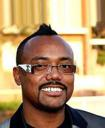
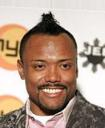
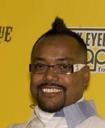
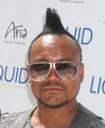
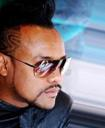
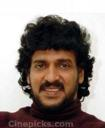
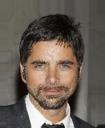
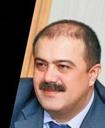
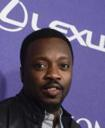
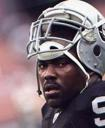

In [109]:

dp.lz[dp["target"] == 1]#[["object_image", "target", "slice"]]

,image_id (PandasSeriesColumn),identity (PandasSeriesColumn),file (PandasSeriesColumn),5_o_clock_shadow (PandasSeriesColumn),arched_eyebrows (PandasSeriesColumn),attractive (PandasSeriesColumn),bags_under_eyes (PandasSeriesColumn),bald (PandasSeriesColumn),bangs (PandasSeriesColumn),big_lips (PandasSeriesColumn),big_nose (PandasSeriesColumn),black_hair (PandasSeriesColumn),blond_hair (PandasSeriesColumn),blurry (PandasSeriesColumn),brown_hair (PandasSeriesColumn),bushy_eyebrows (PandasSeriesColumn),chubby (PandasSeriesColumn),double_chin (PandasSeriesColumn),eyeglasses (PandasSeriesColumn),goatee (PandasSeriesColumn),gray_hair (PandasSeriesColumn),heavy_makeup (PandasSeriesColumn),high_cheekbones (PandasSeriesColumn),male (PandasSeriesColumn),mouth_slightly_open (PandasSeriesColumn),mustache (PandasSeriesColumn),narrow_eyes (PandasSeriesColumn),no_beard (PandasSeriesColumn),oval_face (PandasSeriesColumn),pale_skin (PandasSeriesColumn),pointy_nose (PandasSeriesColumn),receding_hairline (PandasSeriesColumn),rosy_cheeks (PandasSeriesColumn),sideburns (PandasSeriesColumn),smiling (PandasSeriesColumn),straight_hair (PandasSeriesColumn),wavy_hair (PandasSeriesColumn),wearing_earrings (PandasSeriesColumn),wearing_hat (PandasSeriesColumn),wearing_lipstick (PandasSeriesColumn),wearing_necklace (PandasSeriesColumn),wearing_necktie (PandasSeriesColumn),young (PandasSeriesColumn),img_path (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),slices (NumpyArrayColumn),target (NumpyArrayColumn),correlate (NumpyArrayColumn),probs (NumpyArrayColumn),split (PandasSeriesColumn),emb (NumpyArrayColumn),pred_slices (NumpyArrayColumn)
0,053577.jpg,8993,053577.jpg,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,/home/common/datasets/celeba/img_align_celeba/053577.jpg,7352,,"np.ndarray(shape=(2,))",0,1,0.965379,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
1,148578.jpg,5579,148578.jpg,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,/home/common/datasets/celeba/img_align_celeba/148578.jpg,1124,,"np.ndarray(shape=(2,))",0,1,0.885066,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
2,095813.jpg,2070,095813.jpg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,/home/common/datasets/celeba/img_align_celeba/095813.jpg,5782,,"np.ndarray(shape=(2,))",0,1,0.964774,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
3,023041.jpg,4073,023041.jpg,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/023041.jpg,7120,,"np.ndarray(shape=(2,))",0,1,0.989564,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
4,092077.jpg,8741,092077.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/092077.jpg,376,,"np.ndarray(shape=(2,))",0,1,0.912414,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
5,167621.jpg,4404,167621.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/167621.jpg,8288,,"np.ndarray(shape=(2,))",0,1,0.995984,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
6,132408.jpg,9951,132408.jpg,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,/home/common/datasets/celeba/img_align_celeba/132408.jpg,5417,,"np.ndarray(shape=(2,))",0,1,0.983479,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
7,201005.jpg,6153,201005.jpg,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,/home/common/datasets/celeba/img_align_celeba/201005.jpg,9497,,"np.ndarray(shape=(2,))",0,0,0.989203,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
8,109128.jpg,498,109128.jpg,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,/home/common/datasets/celeba/img_align_celeba/109128.jpg,7682,,"np.ndarray(shape=(2,))",0,1,0.991485,t
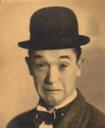
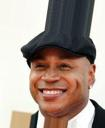
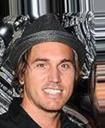
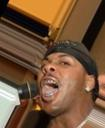
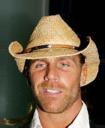
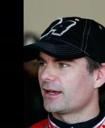
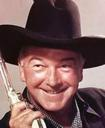
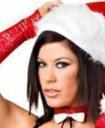
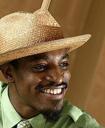
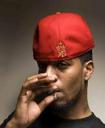

In [103]:

dp.lz[dp["pred_slices"].data[:, pred_slice_idx].argsort()[-10:]]#[["object_image", "target", "slice"]]

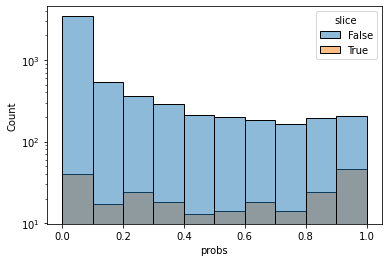

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plot_df = pd.DataFrame(
    {"probs": dp["probs"], "slice": dp["slices"][:, slice_idx], "target": dp["target"]}
)
sns.histplot(
    data=plot_df[plot_df["target"] == 0],
    x="probs",
    hue="slice",
    stat="count",
    common_norm=not False,
    binwidth=0.1,
)
plt.yscale("log")
